In [1]:
clear;
fclose all;     %关闭所有matlab打开的文件

% 读取配置和验证文件
sf = 10;
bw = 125e3;
samplesRate = 2e6;
[loraSet] = readLoraSet('GeneralConfig.json', sf, bw, samplesRate, 'C:\Users\\ryon_\OneDrive\All_Project\LoRa_IDE\LoRaCode\NogChirp\Config\');


In [19]:
% 读取文件夹下采样值文件
fileDir = '\\192.168.3.102\e\data\channel2_231220\';
fileIn = dir(fullfile(fileDir, '*.sigmf-data'));
% 从文件中读取信号流
[signal] = readSignalFile(fileDir, fileIn(2));

16384=0.008192*2e6

In [20]:
loraSet.payloadNum = 23; % payload数目
obj = NogChirpDecoder(loraSet);
obj.preambleSignal = signal;

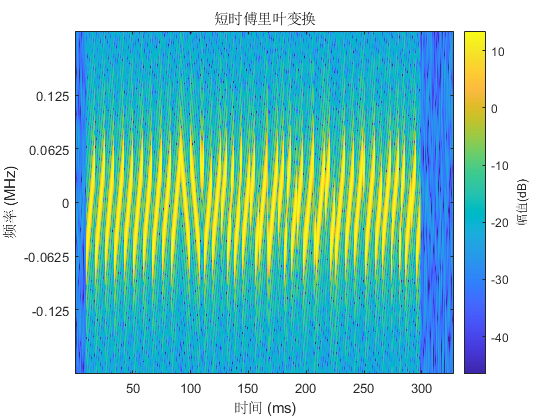

In [25]:
stft(signal(1:40*obj.loraSet.dine), obj.loraSet.sample_rate, 'Window',kaiser(64,2),'OverlapLength',32,'FFTLength',obj.loraSet.fft_x);
% stft(signal(40*dine+1:100*dine), sample_rate, 'Window',rectwin(64),'OverlapLength',32,'FFTLength',fft_x);
ylim([-0.2, 0.2]);
yticks(-125e3/1e6 : 125e3/1e6/2 : 125e3/1e6);

In [10]:
len = length(signal);
len/obj.loraSet.dine


ans =

   152




In [ ]:
823+148=971


a =

   997




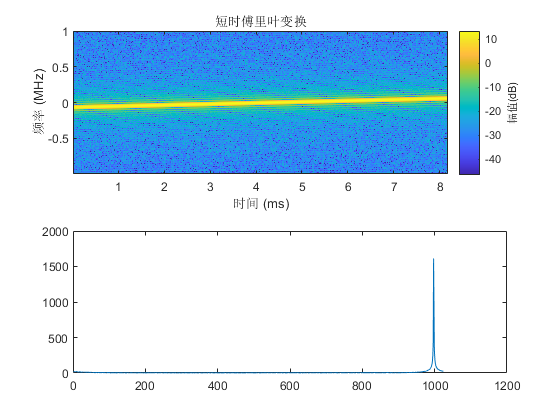

In [73]:
offset = 2793;  % 19610
preambleSignalTemp = circshift(obj.preambleSignal, -round(offset));
Ts = 2;
signal_tmp = preambleSignalTemp((Ts - 1) * obj.loraSet.dine + 1: Ts * obj.loraSet.dine);
dechirp = signal_tmp .* obj.idealDownchirp;  % 823, 148
dechirp_fft = abs(fft(dechirp, obj.loraSet.dine));
dechirp_fft = dechirp_fft(1 : obj.loraSet.fft_x) + dechirp_fft(obj.loraSet.dine - obj.loraSet.fft_x + 1 : obj.loraSet.dine);
subplot(211)
stft(signal_tmp, obj.loraSet.sample_rate, 'Window',kaiser(64,2),'OverlapLength',32,'FFTLength',obj.loraSet.fft_x);
subplot(212)
plot(dechirp_fft);
[~ , a] = max(dechirp_fft);
a
% Sum = sum(dechirp_fft)
% signalOut = obj.findpeaksWithShift(dechirp_fft, obj.loraSet.fft_x); % 找峰值
% [pos] = signalOut(2,:);
% pos(1:7)
% std2(dechirp_fft)

In [56]:
candidate = zeros(1, obj.loraSet.Preamble_length + 2);

for t = 1 : obj.loraSet.Preamble_length + 4
    signal_tmp = obj.preambleSignal((t - 1) * obj.loraSet.dine + 1 : t * obj.loraSet.dine);
    dechirp = signal_tmp .* obj.idealDownchirp;
    dechirp_fft = abs(fft(dechirp, obj.loraSet.dine));
    dechirp_fft = dechirp_fft(1 : obj.loraSet.fft_x) + dechirp_fft(obj.loraSet.dine - obj.loraSet.fft_x + 1 : obj.loraSet.dine);
    [~, candidate(t)] = max(dechirp_fft);
end

In [62]:
obj = obj.detectPreambleBinBehind();  % obj.PreambleBin 823

   823




In [ ]:
fft(signal, 16384);

In [57]:
obj.PreambleBin


ans =

     []




In [58]:
obj.preambleEndPos


ans =

     []




In [54]:
disp(obj.decode(signal).binRecord);

  列 1 至 13

         810        1010         386         614         850         406         126        1022         367         677         347         284          27

  列 14 至 23

         551         991         990          49         827         822          85         265         587         421


